In [1]:
import os
import numpy as np
%matplotlib notebook

import matplotlib.pyplot as plt
import pytransform3d.transformations as pt
import pytransform3d.trajectories as ptr
import pytransform3d.rotations as pr
import pytransform3d.camera as pc
import torch

In [2]:
sample_carla = torch.load("sample_carla.pth")
sample_nerds = torch.load("sample_nerds.pth")

In [3]:
print(sample_carla["src_focal"])
print(sample_carla["src_c"])

tensor([400., 400., 400., 400., 400., 400., 400., 400., 400., 400., 400., 400.,
        400., 400., 400., 400., 400., 400., 400.])
tensor([[400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.],
        [400., 300.]])


In [4]:
print(sample_nerds["src_focal"])
print(sample_nerds["src_c"])


tensor([190.6806, 190.6806, 190.6806, 190.6806, 190.6806, 190.6806, 190.6806,
        190.6806, 190.6806, 190.6806, 190.6806, 190.6806, 190.6806, 190.6806,
        190.6806, 190.6806, 190.6806, 190.6806, 190.6806])
tensor([[160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.],
        [160., 120.]])


In [5]:
def plot(sample, rot=np.identity(4)):
    for i in range(len(sample["src_poses"])):

        cam2world = sample["src_poses"][i]
        focal = sample["src_focal"][i]
        c = sample["src_c"][i]
        K = np.array([
        [focal,0,c[0]],
        [0,focal,c[1]],
        [0,0,1]
        ])
        
        cam2world = np.matmul(cam2world,rot)

        ax = pt.plot_transform(A2B=cam2world, s=0.2)
        # pc.plot_camera(
        #     ax, cam2world=cam2world, M=K,
        #     virtual_image_distance=0.1)

<IPython.core.display.Javascript object>


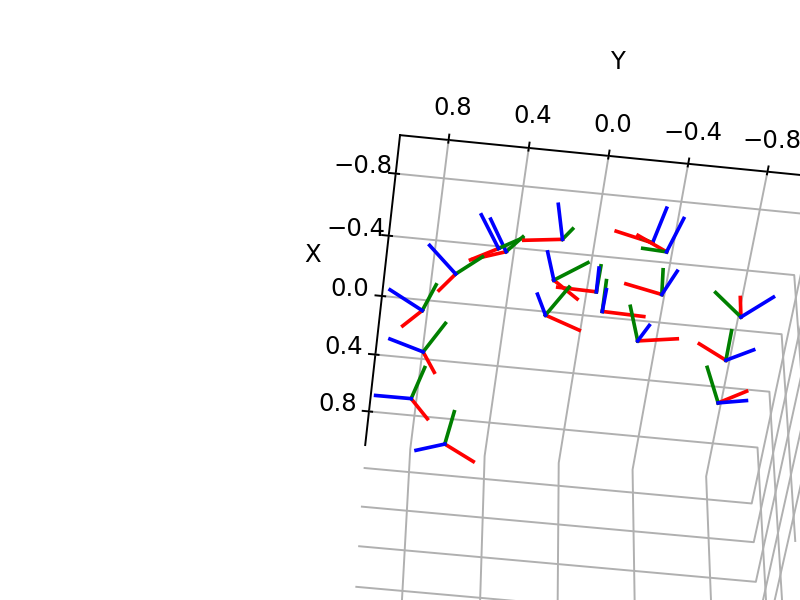

In [16]:
# rot = np.array([[1, 0, 0, 0],
#                     [0, 0, -1, 0],
#                     [0, 1, 0, 0],
#                     [0, 0, 0, 1]]).T


# rot = np.array([[0, -1, 0, 0],
#                     [1, 0, 0, 0],
#                     [0, 0, 1, 0],
#                     [0, 0, 0, 1]]).T


# rot = np.array([[0, 0, 1, 0],
#                     [0, 1, 0, 0],
#                     [-1, 0, 0, 0],
#                     [0, 0, 0, 1]])

# rot = np.array([[1, 0, 0, 0],
#                       [0, -1, 0, 0],
#                       [0, 0, -1, 0],
#                       [0, 0, 0, 1]]).T

rot = np.array([[-1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, -1, 0],
                      [0, 0, 0, 1]]).T

rot = rot @ np.array([[-1, 0, 0, 0],
                      [0, -1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]]).T

plot(sample_carla,np.eye(4))

In [10]:
rot = np.array([[-1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, -1, 0],
                      [0, 0, 0, 1]]).T

rot = rot @ np.array([[-1, 0, 0, 0],
                      [0, -1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]]).T

print(rot)

[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0  1]]


<IPython.core.display.Javascript object>


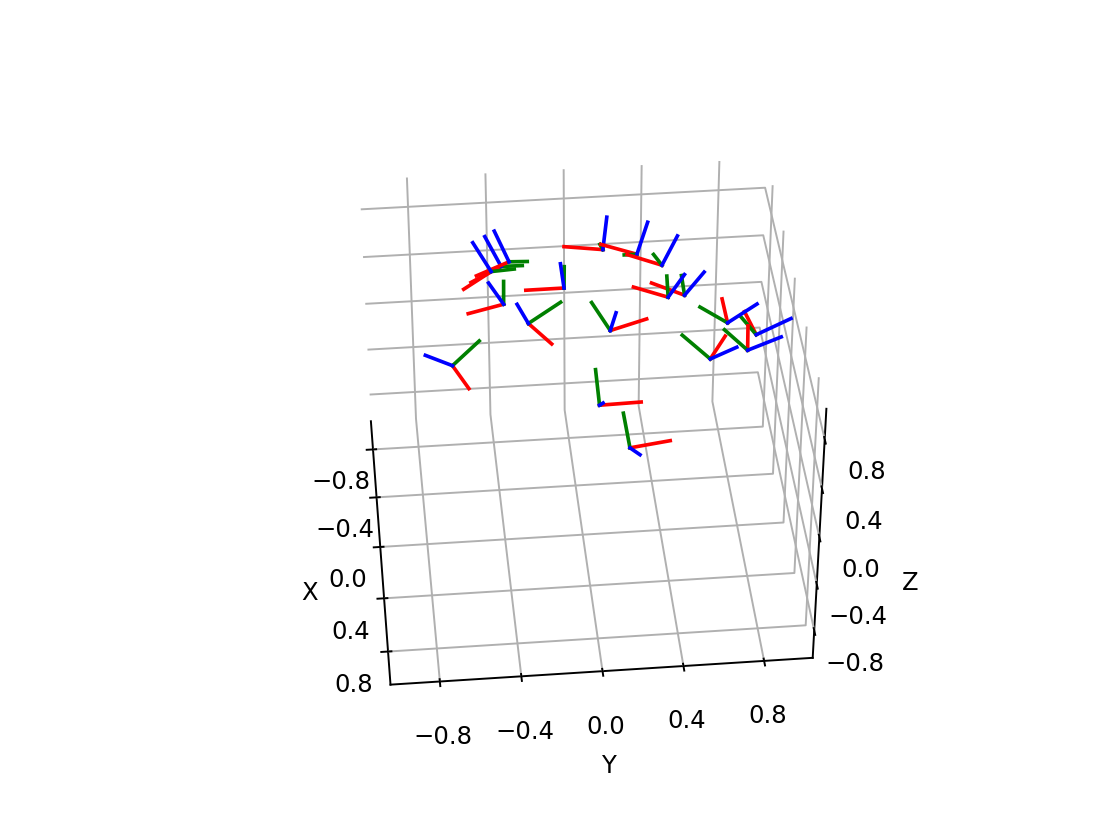

In [15]:
plot(sample_nerds)

<IPython.core.display.Javascript object>


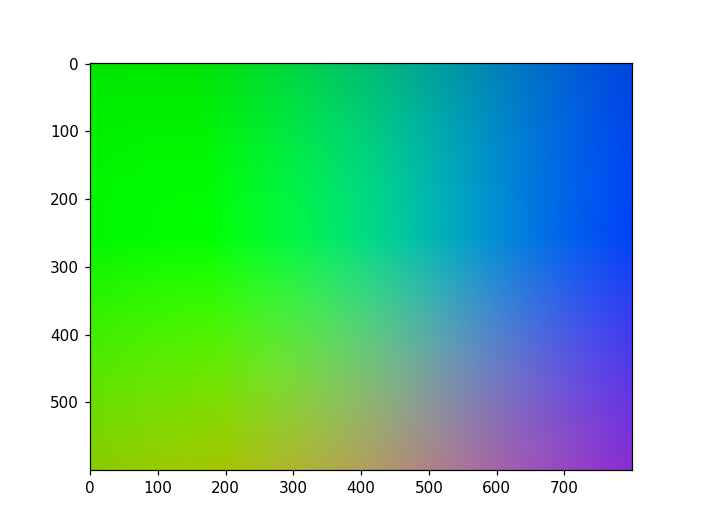

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [27]:
plt.imshow(sample_carla["viewdirs"].view(600,800,3))

<IPython.core.display.Javascript object>


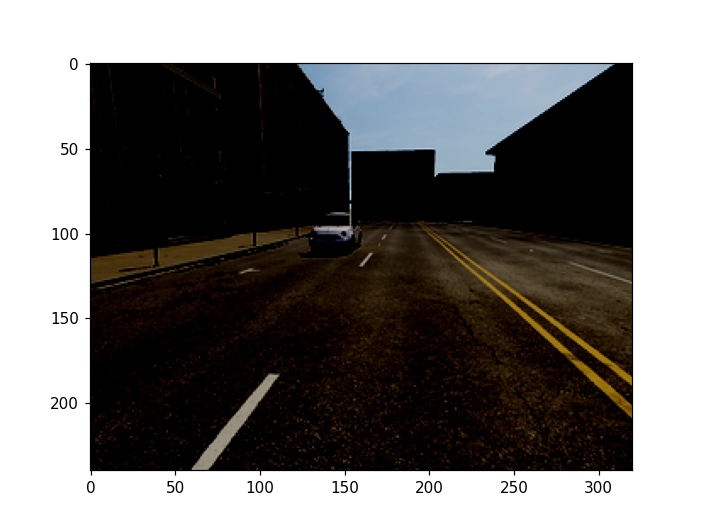

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [37]:
plt.imshow(sample_carla["src_imgs"][10].permute(1,2,0))

In [38]:
plt.imshow(sample_nerds["src_imgs"][2].permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
